<a href="https://colab.research.google.com/github/Chocoding1/Machine_Learning_Deep_Learning/blob/main/%5BDeep%20Learning%5D%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 인식 - 컨볼루션 신경망(CNN)

In [15]:
# 데이터 불러오기
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'train set : {X_train.shape}')
print(f'test set : {X_test.shape}')

train set : (60000, 28, 28)
test set : (10000, 28, 28)


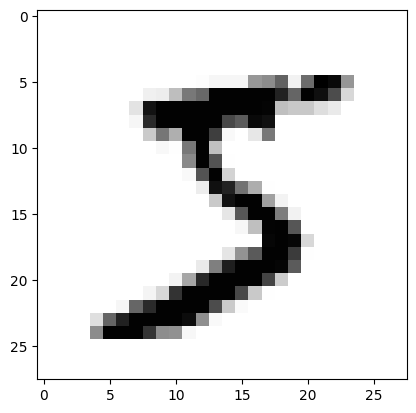

In [16]:
# 이미지 출력
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys') # imshow() : 이미지 출력 함수
plt.show()

이미지들은 28 x 28 픽셀로 구성<br>
밝기는 0~255로 나타내며, 0이면 가장 밝은 하얀색 255면 가장 어두운 검은색

In [17]:
# 이미지의 각 픽셀값 출력
import sys

for x in X_train[0]:
  for i in x:
    sys.stdout.write('%-3s' % i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

이렇게 이미지는 다시 숫자의 집합으로 바뀌어 학습 데이터로 사용된다.<br>

즉, 28 x 28 = 784개의 속성을 이용해 0~9의 클래스 중 하나로 예측하는 것

In [18]:
# 학습을 위해 1차원 배열로 변경
X_train = X_train.reshape(X_train.shape[0], 28*28) # (60000, 28, 28) -> (60000, 784)

keras는 데이터를 0에서 1 사이의 값으로 변환한 후 구동할 때 최적의 성능을 보인다.

In [19]:
# 0~255의 모든 픽셀값들을 0~1로 변경 -> 정규화
X_train = X_train.astype('float32') # 나눗셈을 위해 정수형을 실수형으로 변경
X_train /= 255

In [20]:
# 테스트셋도 변경
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32') / 255

In [21]:
# 원-핫 인코딩 적용 (여러 클래스를 0과 1만 이용해서 나타내기 위해)
# to_categorical() : 정수형 클래스 레이블을 원-핫 인코딩 벡터로 변환하는 함수
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10) # to_categorical(클래스, 클래스 개수)
y_test = to_categorical(y_test, 10)

In [22]:
# 변환 확인
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 딥러닝 기본 프레임 생성

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# 모델 자동 저장, 학습 자동 중단 설정
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

modelpath = './mnist_best.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [27]:
# 모델 학습
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.18965, saving model to ./mnist_best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.18965 to 0.13559, saving model to ./mnist_best.hdf5

Epoch 3: val_loss improved from 0.13559 to 0.11396, saving model to ./mnist_best.hdf5

Epoch 4: val_loss improved from 0.11396 to 0.10144, saving model to ./mnist_best.hdf5

Epoch 5: val_loss improved from 0.10144 to 0.09094, saving model to ./mnist_best.hdf5

Epoch 6: val_loss improved from 0.09094 to 0.08596, saving model to ./mnist_best.hdf5

Epoch 7: val_loss improved from 0.08596 to 0.08123, saving model to ./mnist_best.hdf5

Epoch 8: val_loss did not improve from 0.08123

Epoch 9: val_loss did not improve from 0.08123

Epoch 10: val_loss did not improve from 0.08123

Epoch 11: val_loss did not improve from 0.08123

Epoch 12: val_loss improved from 0.08123 to 0.08020, saving model to ./mnist_best.hdf5

Epoch 13: val_loss did not improve from 0.08020

Epoch 14: val_loss improved from 0.08020 to 0.07863, saving model to ./mnist_best.hdf5

Epoch 15: val_loss did not improve from 0.07863

Epoch 16:

In [28]:
# 테스트셋 정확도 출력
print(f'test set accuracy : {model.evaluate(X_test, y_test)[1]}')

313/313 [==============================] - 2s 7ms/step - loss: 0.0711 - accuracy: 0.9813
test set accuracy : 0.9812999963760376


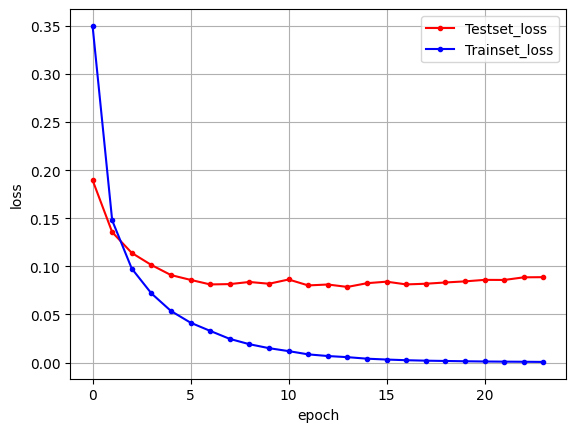

In [29]:
# 실행결과 그래프화
import matplotlib.pyplot as plt
import numpy as np

y_vloss = history.history['val_loss']

y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 컨볼루션 신경망(CNN)

입력된 이미지에서 다시 한 번 특징을 추출하기 위해 커널(슬라이딩 윈도우)을 도입하는 기법

In [ ]:
# Conv2D() : 컨볼루션 층을 추가하는 keras의 함수
from tensorflow.keras.layers import Conv2D

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
# 32 : 커널 개수 / kernel_size : 커널의 크기(여기서는 3 x 3)
# input_shape(행, 열, 색상 또는 흑백) : 앞선 Dense층과 달리 CNN층은 이미지를 1차원으로 하지 않아도 된다.(세 번째 인자는 이미지가 색상이면 3, 흑백이면 1)

In [ ]:
# 컨볼루션 층 하나 더 추가
model.add(Conv2D(64, (3, 3), activation='relu'))

## Max Pooling, Drop Out, Flatten

In [ ]:
# MaxPooling2D() : 맥스 풀링층을 추가하는  keras의 함수
from tensorflow.keras.layers import MaxPooling2D

model.add(MaxPooling2D(pool_size=(2,2)))
# pool_size : 풀링 창 크기

드롭아웃 : 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것<br>
랜덤하게 노드를 꺼주면 과적합 방지

In [ ]:
# 25%의 노드 끄기
from tensorflow.keras.layers import Dropout

model.add(Dropout(0.25))

In [ ]:
# 2차원의 데이터를 다시 Dense층에 보내려면 1차원으로 변환해야 한다.
# 이 때 사용하는 것이 flatten
from tensorflow.keras.layers import Flatten

model.add(Flatten())


Epoch 1: val_loss improved from inf to 0.08746, saving model to ./mnist_best.hdf5

Epoch 2: val_loss improved from 0.08746 to 0.06407, saving model to ./mnist_best.hdf5

Epoch 3: val_loss improved from 0.06407 to 0.05314, saving model to ./mnist_best.hdf5

Epoch 4: val_loss improved from 0.05314 to 0.04901, saving model to ./mnist_best.hdf5

Epoch 5: val_loss improved from 0.04901 to 0.04389, saving model to ./mnist_best.hdf5

Epoch 6: val_loss did not improve from 0.04389

Epoch 7: val_loss did not improve from 0.04389

Epoch 8: val_loss did not improve from 0.04389

Epoch 9: val_loss did not improve from 0.04389

Epoch 10: val_loss did not improve from 0.04389

Epoch 11: val_loss improved from 0.04389 to 0.04130, saving model to ./mnist_best.hdf5

Epoch 12: val_loss did not improve from 0.04130

Epoch 13: val_loss did not improve from 0.04130

Epoch 14: val_loss did not improve from 0.04130

Epoch 15: val_loss did not improve from 0.04130

Epoch 16: val_loss improved from 0.04130 to

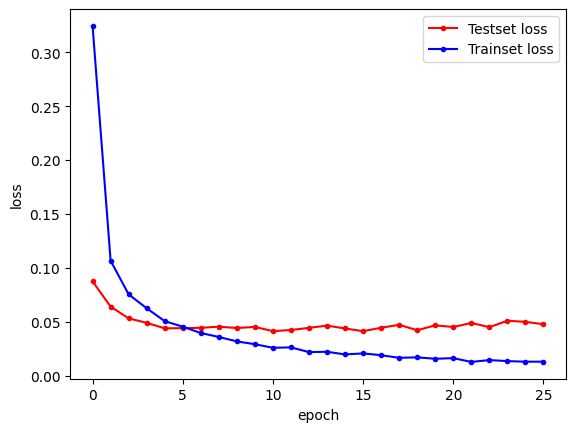

In [35]:
# 전체 코드
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

modelpath = './mnist_best.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[checkpointer, early_stopping_callback])

print(f'Testset Accuracy : {model.evaluate(X_test, y_test)[1]}')

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()